In [296]:
import warnings
warnings.filterwarnings('ignore')

In [297]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
%matplotlib inline

In [298]:
df1=pd.read_csv('titanic.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [299]:
df1.shape

(891, 12)

In [300]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [301]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [302]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [303]:
df1.drop('Cabin',axis=1,inplace=True)

In [304]:
df1.drop('Ticket',axis=1,inplace=True)

In [305]:
df1.drop('Name',axis=1,inplace=True)

In [306]:
df1.drop('PassengerId',axis=1,inplace=True)

In [307]:
df1['Age'].fillna(method='bfill',inplace=True)

In [308]:
df1['Embarked'].fillna(method='bfill',inplace=True)
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [309]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [310]:
df1['Sex']=le.fit_transform(df1['Sex'])


In [311]:
status=pd.get_dummies(df1['Embarked'],drop_first=True)
status.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [312]:
df1=pd.concat([df1,status],axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0,1
1,1,1,0,38.0,1,0,71.2833,C,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,1


In [313]:
df1.drop('Embarked',axis=1,inplace=True)

#### another way to treat outlaiers

In [314]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int32(1), int64(4), uint8(2)
memory usage: 47.1 KB


In [315]:
df1.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.342346
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Q           2.948778
S          -1.003362
dtype: float64

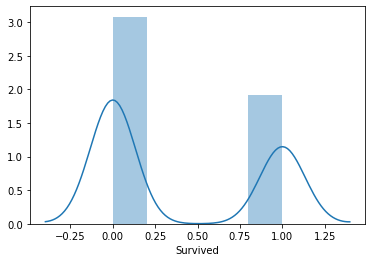

In [316]:
sns.distplot(df1['Survived'])

In [317]:
dff1=df1[(df1['Fare']>(np.mean(df1['Fare'])-(3*np.std(df1['Fare'])))) & (df1['Fare']<(np.mean(df1['Fare'])+2*np.std(df1['Fare'])))]
dff1.shape                                                                                           

(853, 9)

In [318]:
dff1.skew()

Survived    0.547883
Pclass     -0.760689
Sex        -0.687898
Age         0.354071
SibSp       3.757074
Parch       2.910165
Fare        1.868578
Q           2.864611
S          -1.053532
dtype: float64

In [319]:
dff2=dff1[(dff1['SibSp']>(np.mean(dff1['SibSp'])-(3*np.std(dff1['SibSp'])))) & (dff1['SibSp']<(np.mean(dff1['SibSp'])+2.5*np.std(dff1['SibSp'])))]
dff2.shape                                                                                           

(823, 9)

In [320]:
dff2.skew()

Survived    0.504631
Pclass     -0.705013
Sex        -0.687200
Age         0.378243
SibSp       1.963968
Parch       3.370329
Fare        1.973871
Q           2.898607
S          -1.025620
dtype: float64

In [321]:
# dff3=dff2[(dff2['Parch']>(np.mean(dff2['Parch'])-(2.5*np.std(dff2['Parch'])))) & (dff2['Parch']<(np.mean(dff2['Parch'])+1*np.std(dff2['Parch'])))]
# dff3.shape                                                                                           

In [322]:
# dff3.skew()

In [323]:
dff2_cont=dff2[['Age','Fare']]

In [324]:
dff2[dff2['Age']>=71]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
95,0,3,1,71.0,0,0,8.0500,0,1
96,0,1,1,71.0,0,0,34.6542,0,0
493,0,1,1,71.0,0,0,49.5042,0,0
629,0,3,1,80.0,0,0,7.7333,1,0
630,1,1,1,80.0,0,0,30.0000,0,1
851,0,3,1,74.0,0,0,7.7750,0,1


In [325]:
dff2_cont.describe(percentiles=[0.015,0.25,0.5,0.75,0.997])###according to 99.7 % and above r all outlaiers so we rempved it

,Age,Fare
count,823.000000,823.000000
mean,30.318044,23.305548
std,14.299789,23.773802
min,0.420000,0.000000
1.5%,1.000000,0.000000
25%,21.000000,7.895800
50%,29.000000,13.000000
75%,39.000000,26.550000
99.7%,72.602000,120.000000
max,80.000000,120.000000


In [326]:
dff2=dff2[dff2['Age']<71]

In [327]:
dff2[dff2['Fare']>=346]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S


In [328]:
# dff2=dff2[dff2['Fare']<=346]

In [329]:
dff2.shape 

(817, 9)

In [330]:
# dff2[dff2['Age']>=71]

In [331]:
dff2[dff2['Fare']>=346]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S


In [332]:
X=dff2.drop(['Survived'],axis=1)
y=dff2[['Survived']]

In [333]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [334]:
from sklearn.model_selection import train_test_split

In [335]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=101)

In [336]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [337]:
X_train[['Age','Fare']]=sc.fit_transform(X_train[['Age','Fare']])
X_train_scaled=X_train
X_train_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
374,3,0,-1.920368,3,1,-0.120591,0,1
292,2,1,0.408271,0,0,-0.457970,0,0
142,3,0,-0.438507,1,0,-0.335567,0,1
52,1,0,1.325614,1,0,2.169234,0,0
427,2,0,-0.791331,0,0,0.082043,0,1


In [338]:
from sklearn.linear_model import LogisticRegression 
lgr=LogisticRegression()

In [339]:
from sklearn.feature_selection import RFE
rfe=RFE(lgr,6)
rfe=rfe.fit(X_train,y_train)

In [340]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', False, 2),
 ('Fare', True, 1),
 ('Q', True, 1),
 ('S', False, 3)]

In [341]:
selected_col=X_train_scaled.columns[rfe.support_]

In [342]:
X_train_scaled_rfe=X_train_scaled[selected_col]

In [343]:
X_train_scaled_rfe.head()

,Pclass,Sex,Age,SibSp,Fare,Q
374,3,0,-1.920368,3,-0.120591,0
292,2,1,0.408271,0,-0.457970,0
142,3,0,-0.438507,1,-0.335567,0
52,1,0,1.325614,1,2.169234,0
427,2,0,-0.791331,0,0.082043,0


In [344]:
lgr.fit(X_train_scaled_rfe,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [345]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [346]:
lgr.fit(X_train_scaled_rfe,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [347]:
y_pred_lgr_train=lgr.predict(X_train_scaled_rfe)

In [348]:
print('accurarcy',accuracy_score(y_train,y_pred_lgr_train))

accurarcy 0.7898423817863398


In [349]:
print('confusion matrix\n\n',confusion_matrix(y_train,y_pred_lgr_train))

confusion matrix

 [[290  53]
 [ 67 161]]


In [350]:
X_test_rfe=X_test[X_train_scaled_rfe.columns]

In [351]:
y_pred_lgr_test=lgr.predict(X_test_rfe)

In [352]:
print('accurarcy',accuracy_score(y_test,y_pred_lgr_test))
print('confusion matrix\n\n',confusion_matrix(y_test,y_pred_lgr_test))
print('\n\nclassification report: \n\n',classification_report(y_test,y_pred_lgr_test))


accurarcy 0.7520325203252033
confusion matrix

 [[146  18]
 [ 43  39]]


classification report: 

               precision    recall  f1-score   support

           0       0.77      0.89      0.83       164
           1       0.68      0.48      0.56        82

    accuracy                           0.75       246
   macro avg       0.73      0.68      0.69       246
weighted avg       0.74      0.75      0.74       246

